<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/roll_dice_twice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Example
## Roll a Dice Twice
If we roll a dice twice, we will have two numbers, each is between 1 to 6. 
We want to find out the all possible combinations of the pairs and 
the frequency of the sum of each pair. 

In [165]:
import random
import matplotlib.pyplot as plt
import pandas as pd

## Step 1 - Simulate the Experiments
- Use `range(1,7)` to present the six possible numbers of a dice
- Use a tuple `(x, y)` to represent the result of two rolls
- Generate the outcomes using List Comprehension.
- Represent the outcomes using a Python Dictionary.


In [166]:
pair_dict = {(i,j): i+j for i in range(1,7) for j in range(1,7)}
pair_dict

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

## Step 2 Create a Pandas Dataframe
- Use the `items()` function to get the list of items in a dictionary
- Specify column names using `columns=` option

In [167]:
df = pd.DataFrame(data=pair_dict.items(), columns=["Pair", "Pair_Sum"])
df

,Pair,Pair_Sum
0,"(1, 1)",2
1,"(1, 2)",3
2,"(1, 3)",4
3,"(1, 4)",5
4,"(1, 5)",6
5,"(1, 6)",7
6,"(2, 1)",3
7,"(2, 2)",4
8,"(2, 3)",5
9,"(2, 4)",6


In [168]:
df.dtypes

Pair        object
Pair_Sum     int64
dtype: object

## Step 3 - Convert the Tuples to Strings
The `join()` function only take strings as inputs. Tuples don't work.

In [169]:
df["Pair"] = df["Pair"].astype(str)
df.head()

,Pair,Pair_Sum
0,"(1, 1)",2
1,"(1, 2)",3
2,"(1, 3)",4
3,"(1, 4)",5
4,"(1, 5)",6


In [170]:
df.dtypes

Pair        object
Pair_Sum     int64
dtype: object

## Step 4 -  Aggregate the Outcomes 
- Use Pandas `groupby()` Function
- Use `NamedAgg=` option to specify the column name

In [171]:
df_agg = df.groupby("Pair_Sum").agg(
    Pair_List=pd.NamedAgg(column="Pair", aggfunc=", ".join),
    Pair_Count=pd.NamedAgg(column="Pair", aggfunc="count")
)

df_agg

,Pair_List,Pair_Count
Pair_Sum,,
2,"(1, 1)",1
3,"(1, 2), (2, 1)",2
4,"(1, 3), (2, 2), (3, 1)",3
5,"(1, 4), (2, 3), (3, 2), (4, 1)",4
6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5
7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6
8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5
9,"(3, 6), (4, 5), (5, 4), (6, 3)",4
10,"(4, 6), (5, 5), (6, 4)",3


## Step 5 - Visualize the Frequency of Sum 
- Pandas `bar()` plot use the row index `Pair_Sum` as the categorical variable
- Pandas `bar()` plot will plot all numerical variable columns
- Here the categorical variable column `Pair_List` is ignored
- Here we only have one numerical column `Pair_Count`

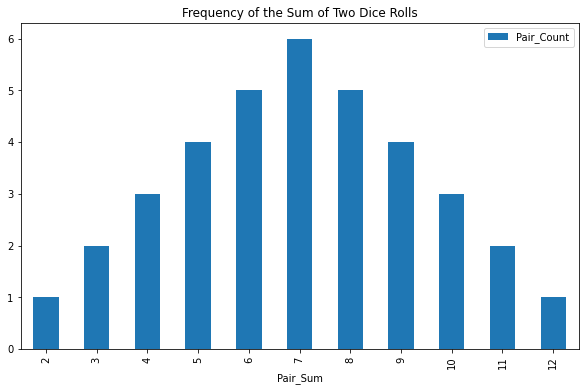

In [172]:
df_agg.plot.bar(figsize=(10,6), title="Frequency of the Sum of Two Dice Rolls")

## Step 6 - Calculate Probability of Each Sum 

In [173]:
total_count = df_agg["Pair_Count"].sum()
df_agg["Probability(%)"] = round(100 * df_agg["Pair_Count"] / total_count, 2)
df_agg

,Pair_List,Pair_Count,Probability(%)
Pair_Sum,,,
2,"(1, 1)",1,2.78
3,"(1, 2), (2, 1)",2,5.56
4,"(1, 3), (2, 2), (3, 1)",3,8.33
5,"(1, 4), (2, 3), (3, 2), (4, 1)",4,11.11
6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5,13.89
7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6,16.67
8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5,13.89
9,"(3, 6), (4, 5), (5, 4), (6, 3)",4,11.11
10,"(4, 6), (5, 5), (6, 4)",3,8.33


## Step 7 - Visualize the Probability of Sum

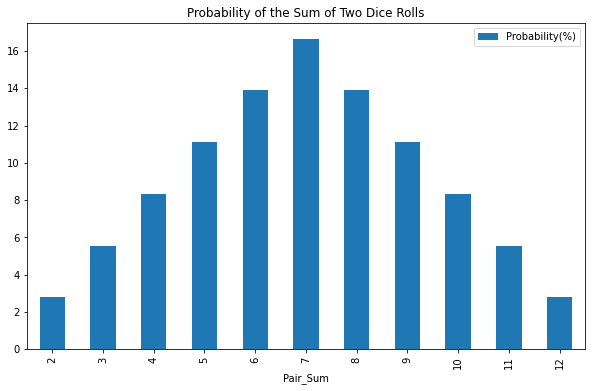

In [174]:
df_agg.plot.bar(y="Probability(%)", figsize=(10,6), title="Probability of the Sum of Two Dice Rolls")

## Step 8 - Visualize both Frequency and Probability in one Chart
- Pandas `bar()` plot use the row index `Pair_Sum` as the categorical variable
- Pandas `bar()` plot will plot all numerical variable columns
- Here the categorical variable column `Pair_List` is ignored
- Here we have two numerical columns:
    - `Pair_Count` 
    - `Probability`

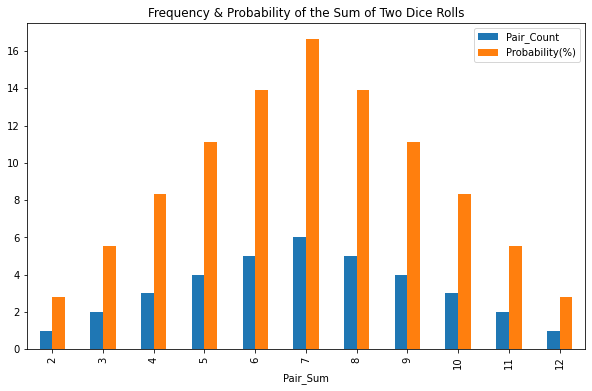

In [175]:
df_agg.plot.bar(figsize=(10,6), title="Frequency & Probability of the Sum of Two Dice Rolls")

Text(0, 0.5, 'Probability')

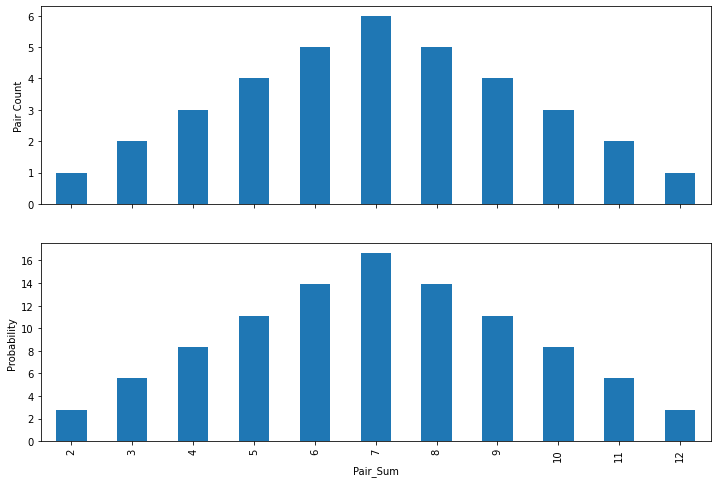

In [176]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)

df_agg["Pair_Count"].plot.bar(ax=ax1)
ax1.set_ylabel("Pair Count")

df_agg["Probability(%)"].plot.bar(ax=ax2)
ax2.set_ylabel("Probability")

## Step 9 - Simulate the Experiment 1000 Times
We will simulate the rolling of a dice twice experiment 1000 times and find out if the above 
frequency distribution of the sum of the two rolls holds

In [177]:
sum_list = []

for i in range(1000):
    sum_list.append(random.randint(1,6) + random.randint(1,6))

sum_list[:20]

[9, 7, 5, 10, 5, 8, 6, 3, 7, 2, 7, 12, 6, 7, 6, 4, 3, 6, 10, 4]

In [178]:
unique_list = set(sum_list)
unique_list

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [179]:
frequency = [sum_list.count(x) for x in unique_list]
frequency

[34, 69, 80, 113, 133, 157, 137, 124, 79, 54, 20]

In [180]:
# Calculate probability (empirical probability vs theoretical probability)

#df_agg["Exp_1000"] = [round(x/10, 2) for x in frequency]
#df_agg

In [181]:
# Alternative to use list Comprehension:
# import numpy as np
# frequency = np.array(frequency)         # convert a Python list to a Numpy array
# probability = frequency / 10            # This division does not work for Python list

In [182]:
#df_agg.iloc[:,2:].plot.bar(figsize=(10,6), title="Probability of the Sum of Two Dice Rolls")

## Step 10 - Simulate the Experiment for different times

In [183]:
def simulate(N):
    sum_list = []
    for i in range(N):
        sum_list.append(random.randint(1,6) + random.randint(1,6))
    unique_list = set(sum_list)
    frequency = [sum_list.count(x) for x in unique_list]
    df_agg[f"Exp_{N}"] = [round(100 * x/N, 2) for x in frequency] 

In [184]:
for n in range(100000, 1000000, 200000):
    simulate(n)
    
df_agg

,Pair_List,Pair_Count,Probability(%),Exp_100000,Exp_300000,Exp_500000,Exp_700000,Exp_900000
Pair_Sum,,,,,,,,
2,"(1, 1)",1,2.78,2.81,2.74,2.80,2.79,2.77
3,"(1, 2), (2, 1)",2,5.56,5.56,5.61,5.59,5.58,5.52
4,"(1, 3), (2, 2), (3, 1)",3,8.33,8.16,8.29,8.30,8.39,8.36
5,"(1, 4), (2, 3), (3, 2), (4, 1)",4,11.11,11.10,11.10,11.13,11.08,11.10
6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5,13.89,13.88,13.96,13.89,13.83,13.90
7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6,16.67,16.69,16.58,16.64,16.66,16.68
8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5,13.89,14.00,13.90,13.93,13.82,13.91
9,"(3, 6), (4, 5), (5, 4), (6, 3)",4,11.11,11.14,11.08,11.12,11.14,11.06
10,"(4, 6), (5, 5), (6, 4)",3,8.33,8.27,8.42,8.29,8.35,8.33


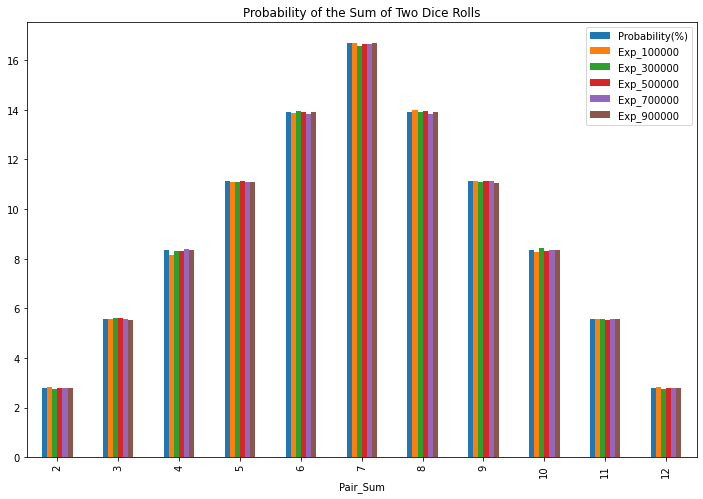

In [185]:
df_agg.iloc[:,2:].plot.bar(figsize=(12,8), title="Probability of the Sum of Two Dice Rolls")

## The End.